## 1)Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

## 2)Read and explore dataset

In [2]:
dataset = pd.read_csv('data.csv')
dataset.head()

10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0  ...          17.33           184.60      2019.0            0.1622   
1  ...          23.41           158.80      1956.0            0.1238   
2  ...          25.53           152.50      1709.0            0.1444   
3  ...          26.50            98.87       567.7            0.2098   
4  ...          16.67           152.20      1575.0            0.1374   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN  

[5 rows x 33 columns]

In [3]:
dataset.size

18777

## 3) Data Analysis and Visualization

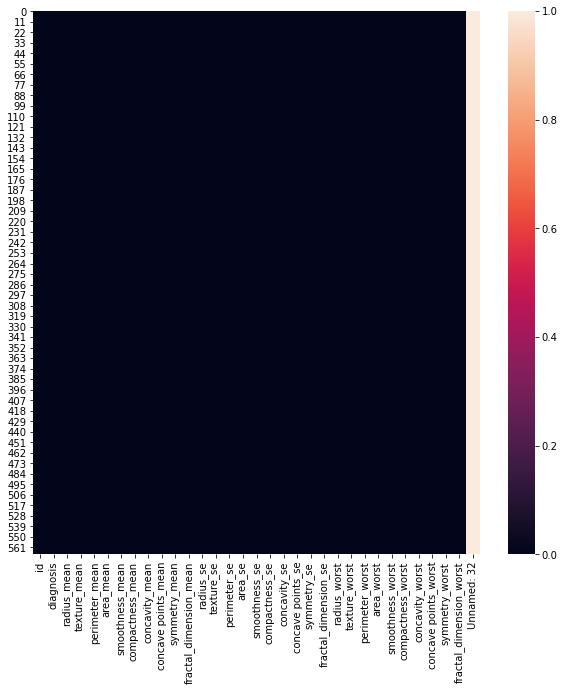

In [4]:
plt.figure(figsize=(10,10))
sn.heatmap(dataset.isnull())

In [5]:
dataset.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

## 4)Feature Selection

### Univariate Feature Selection 

In [6]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [7]:
# We can see that Unnamed:32 has all the NaN values !
#So we will drop this column

In [8]:
dataset.drop(labels=["id","Unnamed: 32"], axis=1, inplace=True)

In [9]:
#Dependent and Independent Feature
X = dataset.drop(labels=["diagnosis"], axis=1)
y = dataset["diagnosis"]
#Converting categorical features to numeric
y = y.map({"M":0,"B":1})

In [10]:
kbeat = SelectKBest(score_func=chi2, k=30).fit(X,y)

In [11]:
dfscore = pd.DataFrame(kbeat.scores_)
dfcol = pd.DataFrame(X.columns)
corr_frame = pd.concat([dfcol, dfscore],axis=1)
corr_frame.columns = ["Features","Scores"]
corr_frame

Features         Scores
0               radius_mean     266.104917
1              texture_mean      93.897508
2            perimeter_mean    2011.102864
3                 area_mean   53991.655924
4           smoothness_mean       0.149899
5          compactness_mean       5.403075
6            concavity_mean      19.712354
7       concave points_mean      10.544035
8             symmetry_mean       0.257380
9    fractal_dimension_mean       0.000074
10                radius_se      34.675247
11               texture_se       0.009794
12             perimeter_se     250.571896
13                  area_se    8758.504705
14            smoothness_se       0.003266
15           compactness_se       0.613785
16             concavity_se       1.044718
17        concave points_se       0.305232
18              symmetry_se       0.000080
19     fractal_dimension_se       0.006371
20             radius_worst     491.689157
21            texture_worst     174.449400
22          perimeter_worst    3665.035416
23               area_worst  112598.431564
24         smoothness_worst       0.397366
25        compactness_worst      19.314922
26          concavity_worst      39.516915
27     concave points_worst      13.485419
28           symmetry_worst       1.298861
29  fractal_dimension_worst       0.231522

In [12]:
corr_frame.nlargest(20, "Scores")

Features         Scores
23            area_worst  112598.431564
3              area_mean   53991.655924
13               area_se    8758.504705
22       perimeter_worst    3665.035416
2         perimeter_mean    2011.102864
20          radius_worst     491.689157
0            radius_mean     266.104917
12          perimeter_se     250.571896
21         texture_worst     174.449400
1           texture_mean      93.897508
26       concavity_worst      39.516915
10             radius_se      34.675247
6         concavity_mean      19.712354
25     compactness_worst      19.314922
27  concave points_worst      13.485419
7    concave points_mean      10.544035
5       compactness_mean       5.403075
28        symmetry_worst       1.298861
16          concavity_se       1.044718
15        compactness_se       0.613785

### Finding the correlation between features

In [13]:
correlation = dataset.corr()
corr_85 = correlation[correlation>0.85]
corr_85.head()

s_mean  symmetry_mean  fractal_dimension_mean  \
radius_mean                      NaN            NaN                     NaN   
texture_mean                     NaN            NaN                     NaN   
perimeter_mean              0.850977            NaN                     NaN   
area_mean                        NaN            NaN                     NaN   
smoothness_mean                  NaN            NaN                     NaN   

                 ...  radius_worst  texture_worst  perimeter_worst  \
radius_mean      ...      0.969539            NaN         0.965137   
texture_mean     ...           NaN       0.912045              NaN   
perimeter_mean   ...      0.969476            NaN         0.970387   
area_mean        ...      0.962746            NaN         0.959120   
smoothness_mean  ...           NaN            NaN              NaN   

                 area_worst  smoothness_worst  compactness_worst  \
radius_mean        0.941082               NaN                NaN   
texture_mean            NaN               NaN                NaN   
perimeter_mean     0.941550               NaN                NaN   
area_mean          0.959213               NaN                NaN   
smoothness_mean         NaN               NaN                NaN   

                 concavity_worst  concave points_worst  symmetry_worst  \
radius_mean                  NaN                   NaN             NaN   
texture_mean                 NaN                   NaN             NaN   
perimeter_mean               NaN                   NaN             NaN   
area_mean                    NaN                   NaN             NaN   
smoothness_mean              NaN                   NaN             NaN   

                 fractal_dimension_worst  
radius_mean                          NaN  
texture_mean                         NaN  
perimeter_mean                       NaN  
area_mean                            NaN  
smoothness_mean                      NaN  

[5 rows x 30 columns]

In [14]:
co_related = set()

for ele in range(len(correlation.columns)//2):
    for j in range(ele,len(correlation.columns)):
        if ele != j and correlation.iloc[ele,j] > 0.85:
            print(correlation.columns[ele], "->",correlation.columns[j])
            co_related.add(correlation.columns[j])
print(co_related)

radius_mean -> perimeter_mean
radius_mean -> area_mean
radius_mean -> radius_worst
radius_mean -> perimeter_worst
radius_mean -> area_worst
texture_mean -> texture_worst
perimeter_mean -> area_mean
perimeter_mean -> concave points_mean
perimeter_mean -> radius_worst
perimeter_mean -> perimeter_worst
perimeter_mean -> area_worst
area_mean -> radius_worst
area_mean -> perimeter_worst
area_mean -> area_worst
compactness_mean -> concavity_mean
compactness_mean -> compactness_worst
concavity_mean -> concave points_mean
concavity_mean -> concavity_worst
concavity_mean -> concave points_worst
concave points_mean -> perimeter_worst
concave points_mean -> concave points_worst
radius_se -> perimeter_se
radius_se -> area_se
perimeter_se -> area_se
{'compactness_worst', 'texture_worst', 'area_mean', 'radius_worst', 'concave points_worst', 'area_worst', 'perimeter_se', 'concavity_worst', 'perimeter_mean', 'perimeter_worst', 'concave points_mean', 'concavity_mean', 'area_se'}


In [15]:
#Droping related columns
X.drop(labels=co_related, axis=1, inplace=True)

In [16]:
corr_frame.nsmallest(13,'Scores')

Features    Scores
9    fractal_dimension_mean  0.000074
18              symmetry_se  0.000080
14            smoothness_se  0.003266
19     fractal_dimension_se  0.006371
11               texture_se  0.009794
4           smoothness_mean  0.149899
29  fractal_dimension_worst  0.231522
8             symmetry_mean  0.257380
17        concave points_se  0.305232
24         smoothness_worst  0.397366
15           compactness_se  0.613785
16             concavity_se  1.044718
28           symmetry_worst  1.298861

In [17]:
best_features = corr_frame.nsmallest(13,'Scores')['Features']

In [18]:
X.drop(labels=best_features, axis=1, inplace=True)
X

radius_mean  texture_mean  compactness_mean  radius_se
0          17.99         10.38           0.27760     1.0950
1          20.57         17.77           0.07864     0.5435
2          19.69         21.25           0.15990     0.7456
3          11.42         20.38           0.28390     0.4956
4          20.29         14.34           0.13280     0.7572
..           ...           ...               ...        ...
564        21.56         22.39           0.11590     1.1760
565        20.13         28.25           0.10340     0.7655
566        16.60         28.08           0.10230     0.4564
567        20.60         29.33           0.27700     0.7260
568         7.76         24.54           0.04362     0.3857

[569 rows x 4 columns]

## 5) Model Selection

In [19]:
# Strandlising Data
from sklearn.preprocessing import StandardScaler
sc_scale = StandardScaler()
X = sc_scale.fit_transform(X)

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.33,random_state = 10)

In [21]:
# Using XGBoost Classifier
from xgboost import XGBClassifier
classify = XGBClassifier()

In [22]:
#Hyper parameter optimization
hyper_param = {'learning_rate':[0.05,0.10,0.15,0.20,0.25,0.30],
    'max_depth':[3,4,5,6,8,10,12,15],
    'min_child_weight':[1,3,5,7],
    'gamma':[0.1,0.2,0.3,0.4],
    'colsample_bytree':[0.3,0.4,0.5,0.7],
    }

In [23]:
from sklearn.model_selection import RandomizedSearchCV
random_search = RandomizedSearchCV(classify,param_distributions=hyper_param,n_jobs=-1, scoring="roc_auc",cv=5, verbose=3, random_state=10)

In [24]:
random_search.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    5.2s finished
[13:44:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100,...
                                           reg_lambda=None,
                                           scale_pos_weight=None,
                                           subsample=No

In [25]:
random_search.best_params_

{'min_child_weight': 7,
 'max_depth': 6,
 'learning_rate': 0.25,
 'gamma': 0.3,
 'colsample_bytree': 0.3}

In [26]:
best_model = random_search.best_estimator_
y_predi = best_model.predict(X_test)

In [34]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test,y_predi)
print("Model Accuracy : ", score*100,"%")

Model Accuracy :  93.08510638297872 %
